In [2]:
from collections import defaultdict

In [1]:
[[0]*5]*5

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [5]:
edges = [
    (1, 2),  (2, 4), (2, 5), 
    (3, 6),  (4, 8), (4, 7),  
    (6, 10), (7, 8), (9, 10)
]

In [3]:
def graphm(vert, edges):                                  # graph using matrices    
    arr=[[0]*vert for i in range(vert)]
    for edge in edges:
        u,v= edge
        arr[u][v], arr[v][u]=1,1
    return arr

# Example
V1 = 3
edges1 = [(0, 1), (1, 2), (2, 0)]
graphm(V1, edges1)

[[0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [24]:
def graphd(edges):                                        #graph using dictionaries
    arr=defaultdict(list)
    for i in edges:
        u,v=i
        arr[u].append(v)
        arr[v].append(u)

    return arr
adj=graphd(edges)
print(adj)

defaultdict(<class 'list'>, {1: [2], 2: [1, 4, 5], 4: [2, 8, 7], 5: [2], 3: [6], 6: [3, 0], 8: [4, 7], 7: [4, 8], 0: [6, 9], 9: [0]})


In [11]:
def graphd1(edges):
    arr = defaultdict(list)
    for u, v in edges:
        arr[u].append(v)
        arr[v].append(u)
    return arr
graphd1(edges1)

defaultdict(list, {0: [1, 2], 1: [0, 2], 2: [1, 0]})

In [26]:
def bfs(start ,n , adj):
    ans=[]
    visited= [0]*n
    visited[start]=1
    queue= [start]
    while queue:
        node= queue.pop(0)
        ans.append(node)
        for neb in adj[node]:
       
            if visited[neb]!=1:
                visited[neb]=1
                queue.append(neb)
    return ans
bfs(0,10,adj )


[0, 6, 9, 3]

In [27]:
def dfs(node, vis, adj, ans):
    vis[node]=1
    ans.append(node)
    for neb in adj[node]:
        if vis[neb]!=1:
            dfs(neb, vis, adj, ans)
def sol(n,adj):
    visited=[0]*n
    start=0
    ans=[]
    dfs(start, visited, adj, ans)
    return ans
sol(10, adj)
        

[0, 6, 3, 9]

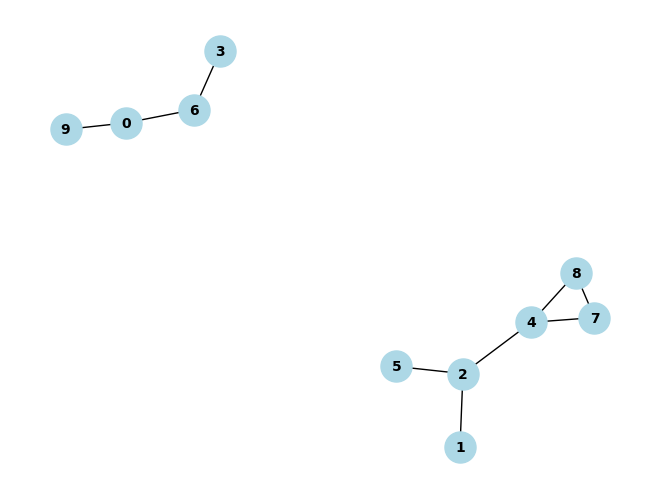

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [
    (1, 2),  (2, 4), (2, 5), 
    (3, 6),  (4, 8), (4, 7),  
    (6, 0), (7, 8), (9, 0)
]

G = nx.Graph()
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.show()


In [19]:
print(adj)
#using this as my adjacency list
len(adj)

defaultdict(<class 'list'>, {1: [2], 2: [1, 4, 5], 4: [2, 8, 7], 5: [2], 3: [6], 6: [3, 10], 8: [4, 7], 7: [4, 8], 10: [6, 9], 9: [10]})


10

In [16]:
def dfs(node, vis, adj):
    vis[node]=1
#     ans.append(node)
    for neb in adj[node]:
        if vis[neb]!=1:
            dfs(neb, vis, adj)

# Questions  from L7:

# provines/ islands/ floodfill/ orange rotting

In [17]:
def provinces(n, adj):
    visited=[0]*(n+1)
    count=0
    for i in range(1,n+1):
        if visited[i]!=1:
            count+=1
            dfs(i, visited, adj)
            
    return count
provinces(10, adj)
    

2

In [18]:
def islands(grid):
    m= len(grid)
    n=len(grid[0])
    visited=[[0]*n for i in range(m)]
    count=0
    for i in range(m):
        for j in range(n):
            if grid[i][j]==1 and visited[i][j]==0:
                traverse(i, j, grid, visited)
                count+=1
    return count
def traverse(i, j, grid, visited):
    m, n= len(grid), len(grid[0])
    queue= [(i,j)]
    visited[i][j]=1
    while queue:
        row, col= queue.pop(0)
        for i in range(-1,2):
            for j in range(-1, 2):
                nrow, ncol= row+i, col+j
                if 0<=nrow< m and 0<=ncol<n and grid[nrow][ncol]==1 and visited[nrow][ncol]!=1:
                    visited[nrow][ncol]=1
                    queue.append((nrow, ncol))

                    # Example grid
grid = [
    [1, 1, 0, 0, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 1, 1],
    [0, 0, 1, 0, 0]
]

print(islands(grid))  

2


In [19]:
class Solution:
    def floodFill(self, grid, sr: int, sc: int, final: int):
        
        def dfs(grid, i, j, inicolor, final, ans, delrow, delcol):
            m,n= len(grid), len(grid[0])
            ans[i][j]= final
            for x in range(4):
                nrow, ncol= i+ delrow[x], j+ delcol[x]
                if 0<=nrow< m and 0<=ncol<n and grid[nrow][ncol]==inicolor and ans[nrow][ncol]!= final:
                    dfs(grid, nrow, ncol, inicolor, final, ans, delrow, delcol)            
        

        ans= grid.copy()
        m, n= len(grid), len(grid[0])
        inicolor= grid[sr][sc]
        visited= [[0]*n for i in range(n)]
        delrow=[-1, 0, 1, 0]
        delcol=[0, -1, 0, 1]
        dfs(grid, sr, sc, inicolor, final, ans, delrow, delcol)
        return ans

In [20]:
class Solution:
    def orangesRotting(self, grid) -> int:
        m, n = len(grid), len(grid[0])
        queue=[]
        visited= [[0]*n for _ in range(m)]
        initial =0 #--->> store initial no. of 1s
        for i in range(m):
            for j in range(n):
                if grid[i][j]== 2:
                    queue.append((i,j,0))
                    visited[i][j]=2
                else:  visited[i][j]=0
                if grid[i][j]==1: initial+=1

        if not queue and initial ==0: return 0
        if not queue: return -1
        delrow=[-1, 0, 1, 0]
        delcol=[0, -1, 0, 1]
        while queue:
            x, y, time= queue.pop(0)

            for k in range(4):
                nrow, ncol= x+ delrow[k], y+ delcol[k]
                if 0<= nrow< m and 0<= ncol<n and  grid[nrow][ncol]==1 and visited[nrow][ncol]==0:
                    visited[nrow][ncol]=2
                    initial-=1
                    queue.append((nrow, ncol, time+1))
        
        return time if initial ==0 else -1

# detecting cycles

In [ ]:
class Solution:
    #Function to detect cycle in an undirected graph.
	def isCycle(self, V: int, adj) -> bool:
	    visited=[0]*V
	    
    	def bfs(source , adj, visited):
    	    visited[source]=1
    	    queue=[]
    	    queue.append((source, -1))
    
    	    while queue:
    	        node, parent= queue.pop(0)
    	        for neb in adj[node]:
    	            if visited[neb]==0:
    	                visited[neb]=1
    	                queue.append((neb,node ))
    	            elif parent != neb: return True 
    	    return False
    	    
	    for i in range(V):
	        if visited[i]==0:
	            if bfs(i, adj, visited):
	                return True
	    return False
    	    

In [25]:
from typing import List
class Solution:
    #Function to detect cycle in an undirected graph.
    def isCycle(self, V: int, adj: List[List[int]]) -> bool:     # v denotes no. of nodes
        visited=[0]*V
        
        def dfs(source,parent,  adj, visited):
            visited[source]=1
            for neb in adj[source]:
                if visited[neb]==0:
                    if dfs(neb,source,  adj, visited): return True
                elif neb!= parent: return True
            return False
        
        for i in range(V):
            if visited[i]==0:
                if dfs(i, -1,adj, visited):
                    return True
        return False  

# dfs/ bfs in grid

In [26]:
# Distance of nearset cell hahving 0/1 matrix

def updateMatrix( mat):
    m, n = len(mat), len(mat[0])
    visited = [[0]*n for _ in range(m)]
    new =  [[0]*n for _ in range(m)]
    queue=[]
    delrow= [-1, 0, 1, 0]
    delcol= [0, -1, 0, 1]

    for i in range(m):
        for j in range(n):
            if mat[i][j]==0:
                queue.append((i,j,0))
                visited[i][j]=1

    while queue:
        x, y, val = queue.pop(0)
        for i in range(4):
            nrow, ncol= x+ delrow[i], y+ delcol[i]
            if 0<= nrow< m and 0<= ncol < n:
                if visited[nrow][ncol]==0:
                    visited[nrow][ncol]=1
                    new[nrow][ncol]= val+1
                    queue.append((nrow, ncol, val+1))
    return new

In [30]:
class Solution:                                   # Os and Xs problem Leetcode 130                  G-14
    def solve(self, board) -> None:
        m, n = len(board), len(board[0])
        queue=[]
        visited=[[0]*n for _ in range(m)]

        for i in range(m):
            if board[i][0]== "O":
                queue.append((i,0))
                visited[i][0]=1
            if board[i][n-1]== "O":
                queue.append((i, n-1))
                visited[i][n-1]=1

        for i in range(n):
            if board[0][i]== "O":
                queue.append(( 0, i ))
                visited[0][i]=1
            if board[m-1][i]== "O":
                queue.append(( m-1, i ))
                visited[m-1][i]=1
        
        delrow= [ -1, 0, 1, 0]
        delcol= [ 0, -1, 0, 1]

        while queue:
            x, y= queue.pop(0)
            for i in range(4):
                nrow, ncol= x + delrow[i], y+ delcol[i]
                if 0<= nrow < m and 0<= ncol < n and board[nrow][ncol]=="O" and visited[nrow][ncol]==0:
                    queue.append((nrow, ncol))
                    visited[nrow][ncol]=1
        
        for i in range(1,m-1):
            for j in range(1,n-1):
                if visited[i][j]==0 and board[i][j]== "O":
                    board[i][j]= "X"
        """
        Do not return anything, modify board in-place instead.
        """

In [31]:
# G-15 and G-14 are exactly the same

# distinct islands

In [32]:
class Solution:
    def countDistinctIslands(self, grid) -> int:
        m, n = len(grid), len(grid[0])
        visited=[[0]*n for i in range(m)]
        s= set()
        delrow= [ -1, 0, 1, 0]
        delcol= [ 0, -1, 0, 1]
        
        def dfs(i, j, lrow, lcol, queue):
            queue.append((i- lrow, j- lcol))
            for k in range(4):
                nrow, ncol= i + delrow[k], j+ delcol[k]
                if 0<= nrow < m and 0<= ncol < n and grid[nrow][ncol]==1 and visited[nrow][ncol]==0:
                    visited[nrow][ncol]=1
                    dfs(nrow, ncol, lrow, lcol, queue)
                    
        for i in range(m):
            for j in range(n):
                if visited[i][j]!=1 and grid[i][j]==1:
                    queue=[]
                    visited[i][j]=1
                    dfs(i, j, i, j,queue)
                    s.add(tuple(queue))                  # remember this line   v.v important 
        return len(s)

# bipartite graphs

In [33]:
class Solution:
    def isBipartite(self, graph) -> bool:
        n=len(graph)
        visited=[-1]*n
        def bfs(i):
            queue=[(i,0)]
            while queue:
                node, flag = queue.pop(0)
                visited[node]= flag
                for neb in graph[node]:
                    if visited[neb]==-1:
                        visited[neb]= 1-flag
                        queue.append((neb, 1-flag))
                    elif visited[neb] == flag: return False
            return True
        
        for i in range(n):
            if visited[i]== -1:
                if bfs(i)== False: return False
        return True

In [34]:
class Solution:
    def isBipartite(self, graph) -> bool:
        n=len(graph)
        visited=[-1]*n

        def dfs(i,flag):
            visited[i]=flag
            for neb in graph[i]:
                if visited[neb]==-1:
                    if dfs(neb, 1-flag)== False: return False
                elif visited[neb]== flag: return False
            return True

        for i in range(n):
            if visited[i]==-1:
                if dfs(i,0)== False: return False
        
        return True

# detect Cycles in Directed graph

In [37]:
class Solution:
    
    #Function to detect cycle in a directed graph.
    def isCyclic(self, V : int , adj ) -> bool :
        # code here
        visited=[0]*V
        path=[0]*V
        
        def dfs(i):
            visited[i]=1
            path[i]=1
            for neb in adj[i]:
                if visited[neb]==0:
                    if dfs(neb): return True
                elif path[neb]==1: return True
            
            path[i]= 0
            return False
        
        for i in range(V):
            if visited[i]==0:
                if dfs(i):return True
        return False

# find eventual safe     -- same as above que

In [39]:
class Solution:
    def eventualSafeNodes(self, graph):
        V= len(graph)
        visited=[0]*V
        path=[0]*V
        queue=[]
        def dfs(i):
            visited[i]=1
            path[i]=1
            for neb in graph[i]:
                if visited[neb]==0:
                    if dfs(neb): return True
                elif path[neb]==1: return True
            
            path[i]= 0
            queue.append(i)
            return False
        
        for i in range(V):
            if visited[i]==0:
                dfs(i)
        return sorted(queue)